### latency.ipynb

Plot scope output for the LED latency experiments.

Compute the mean and std error of duration measurements.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [26]:
def read_and_normalize(file):
    """Read a .csv of voltage measurements from a scope.
    
    Normalize voltage measurements to 0 -> 1
    
    The file should contain headers 'second', 'Volt' and corresponding
    measurement pairs.    
    """
    
    df = pd.read_csv(os.path.join(file), header=1)
    df.apply(pd.to_numeric)

    # Truncate sides for NaN measurements
    seconds = df['second'][5:-5]
    volts = df['Volt'][5:-5]
        
    volts -= np.min(volts)
    volts /= np.max(volts)
    
    return seconds, volts


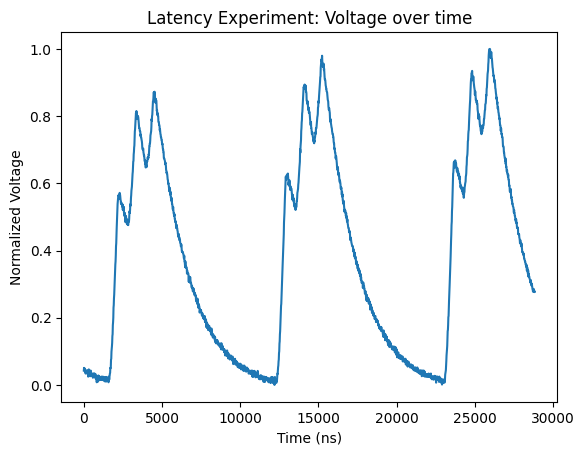

In [27]:
seconds, volts = read_and_normalize('./data/digWrite/digWrite.csv')

plt.title("Latency Experiment: Voltage over time")
plt.xlabel("Time (ns)")
plt.ylabel("Normalized Voltage")
plt.plot(((seconds - seconds.min()) * (10 ** 9)), volts)

In [28]:
# Read measurements from file

durations = []

with open('./data/digWrite/measurements.txt' , 'r') as f:
    for row in f:
        if row[-1] == '\n':
            durations.append(int(row[:-1]))
        else:
            durations.append(int(row))

In [29]:
durations = np.array(durations)

mean = np.mean(durations)
sterr = np.std(durations) / np.sqrt(len(durations))

print(f'Durations mean={mean:.2f}, sterror={sterr:.2f}')

NameError: name 'sqrt' is not defined